In [28]:
class TransportationProblem:
    def __init__(self, N):
        self.N = N

    def startState(self):
        return 1

    def isEnd(self, state):
        return state == self.N

    def succAndCost(self, state):
        result = []
        if state + 1 <= self.N:
            result.append(('walk', state + 1, 1))
        if state * 2 <= self.N:
            result.append(('tram', state * 2, 2))
        return result

def printSolution(solution):
    if solution is None:
        print("No solution found!")
        return
    totalCost, history = solution
    print('Total Cost:', totalCost)
    print('Path:')
    for action, state, cost in history:
        print(f"  {action} to {state} (cost: {cost})")

In [29]:
### Task 1: Dynamic Programming
#Analyze the dynamic programming implementation:

def dynamicProgramming(problem):
    cache = {}
    def futureCost(state):
        if problem.isEnd(state):
            return 0
        if state in cache:
            return cache[state]
        result = min(cost+futureCost(newState) \
                for action, newState, cost in problem.succAndCost(state))
        cache[state] = result
        return result
    return (futureCost(problem.startState()), [])

'''
Tasks:
a. Modify the function to also return the optimal path
b. Add memoization statistics (cache hits/misses)
c. Visualize the memoization table for N=10
'''



'\nTasks:\na. Modify the function to also return the optimal path\nb. Add memoization statistics (cache hits/misses)\nc. Visualize the memoization table for N=10\n'

In [30]:
#a) Modify to return the optimal path

def dynamicProgrammingWithStats(problem):
    cache = {}
    stats = {'hits': 0, 'misses': 0}

    def futureCost(state):
        if problem.isEnd(state):
            return 0, []

        if state in cache:
            stats['hits'] += 1
            return cache[state]

        stats['misses'] += 1
        best = float('inf')
        bestPath = None

        for action, newState, cost in problem.succAndCost(state):
            future, path = futureCost(newState)
            total = cost + future
            if total < best:
                best = total
                bestPath = [(action, newState, cost)] + path

        cache[state] = (best, bestPath)
        return cache[state]

    result, path = futureCost(problem.startState())
    return result, path, stats, cache


In [33]:
#b) Memoization Stats (Hits/Misses)

# this is already included in the above code. We increment:

stats['hits'] += 1     # when state is found in cache
stats['misses'] += 1   # when state is newly computed


In [34]:
print("Memoization Stats:", stats)


Memoization Stats: {'hits': 5, 'misses': 10}


In [31]:
#c) Visualize the Memoization Table (for N=10)
import matplotlib.pyplot as plt

def visualizeMemoization(cache, N):
    states = list(range(1, N+1))
    costs = [cache[state][0] if state in cache else 0 for state in states]

    plt.figure(figsize=(10, 4))
    plt.bar(states, costs, color='skyblue')
    plt.title("Memoization Table (Cost by State)")
    plt.xlabel("State")
    plt.ylabel("Minimum Cost to Reach Goal")
    plt.xticks(states)
    plt.grid(True)
    plt.show()


Total Cost: 6
Path:
walk to 2 (cost: 1)
walk to 3 (cost: 1)
walk to 4 (cost: 1)
walk to 5 (cost: 1)
tram to 10 (cost: 2)

Memoization Stats: {'hits': 4, 'misses': 9}


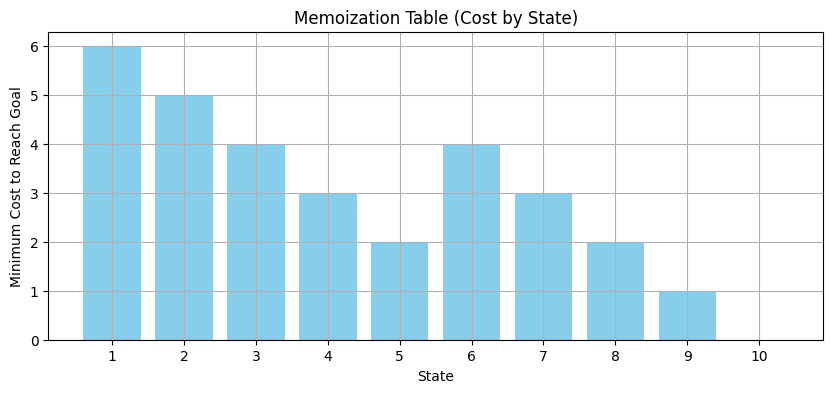

In [32]:
problem = TransportationProblem(10)
result, path, stats, cache = dynamicProgrammingWithStats(problem)

print("Total Cost:", result)
print("Path:")
for action, state, cost in path:
    print(f"{action} to {state} (cost: {cost})")

print("\nMemoization Stats:", stats)

# visualize for N=10
visualizeMemoization(cache, 10)


In [35]:
### Task 2: Uniform Cost Search
#Examine the uniform cost search implementation:

def uniformCostSearch(problem):
    frontier = util.PriorityQueue()
    frontier.update(problem.startState(), 0)
    while True:
        state, pastCost = frontier.removeMin()
        if problem.isEnd(state):
            return (pastCost, [])
        for action, newState, cost in problem.succAndCost(state):
            frontier.update(newState, pastCost+cost)
'''
Tasks:
a. Add path tracking to the implementation
b. Implement a mechanism to visualize the frontier at each step
c. Add an explored set to avoid revisiting states
'''


'\nTasks:\na. Add path tracking to the implementation\nb. Implement a mechanism to visualize the frontier at each step\nc. Add an explored set to avoid revisiting states\n'

In [36]:
# a. Add path tracking to the implementation
import heapq

def uniformCostSearch_a(problem):
    start = problem.startState()

    # each heap element: (total_cost, current_state, path_taken)
    frontier = []
    heapq.heappush(frontier, (0, start, []))

    while frontier:
        total_cost, state, path = heapq.heappop(frontier)

        if problem.isEnd(state):
            return total_cost, path

        for action, new_state, cost in problem.succAndCost(state):
            new_path = path + [(action, new_state, cost)]
            heapq.heappush(frontier, (total_cost + cost, new_state, new_path))



In [37]:
# b. Implement a mechanism to visualize the frontier at each step

def uniformCostSearch_ab(problem):
    start = problem.startState()
    frontier = []
    heapq.heappush(frontier, (0, start, []))

    while frontier:
        # visualize frontier before popping
        print("Frontier:")
        for cost, st, _ in frontier:
            print(f"  State: {st}, Cost: {cost}")
        print("-------------------------")

        total_cost, state, path = heapq.heappop(frontier)
        print(f"Expanding state: {state}, Total cost so far: {total_cost}\n")

        if problem.isEnd(state):
            return total_cost, path

        for action, new_state, cost in problem.succAndCost(state):
            new_path = path + [(action, new_state, cost)]
            heapq.heappush(frontier, (total_cost + cost, new_state, new_path))



In [38]:
# c. Add an explored set to avoid revisiting states

def uniformCostSearch(problem):
    start = problem.startState()
    frontier = []
    heapq.heappush(frontier, (0, start, []))
    explored = set()

    while frontier:
        print("Frontier:")
        for cost, st, _ in frontier:
            print(f"  State: {st}, Cost: {cost}")
        print("-------------------------")

        total_cost, state, path = heapq.heappop(frontier)
        print(f"Expanding state: {state}, Total cost so far: {total_cost}\n")

        # avoid revisiting
        if state in explored:
            continue
        explored.add(state)

        # goal test
        if problem.isEnd(state):
            return total_cost, path

        for action, new_state, cost in problem.succAndCost(state):
            if new_state not in explored:
                new_path = path + [(action, new_state, cost)]
                heapq.heappush(frontier, (total_cost + cost, new_state, new_path))


In [39]:
problem = TransportationProblem(10)
cost, path = uniformCostSearch(problem)

print("Final Result:")
print("Total Cost:", cost)
print("Path:")
for action, state, cost in path:
    print(f"{action} to {state} (cost: {cost})")


Frontier:
  State: 1, Cost: 0
-------------------------
Expanding state: 1, Total cost so far: 0

Frontier:
  State: 2, Cost: 1
  State: 2, Cost: 2
-------------------------
Expanding state: 2, Total cost so far: 1

Frontier:
  State: 2, Cost: 2
  State: 3, Cost: 2
  State: 4, Cost: 3
-------------------------
Expanding state: 2, Total cost so far: 2

Frontier:
  State: 3, Cost: 2
  State: 4, Cost: 3
-------------------------
Expanding state: 3, Total cost so far: 2

Frontier:
  State: 4, Cost: 3
  State: 4, Cost: 3
  State: 6, Cost: 4
-------------------------
Expanding state: 4, Total cost so far: 3

Frontier:
  State: 4, Cost: 3
  State: 6, Cost: 4
  State: 5, Cost: 4
  State: 8, Cost: 5
-------------------------
Expanding state: 4, Total cost so far: 3

Frontier:
  State: 5, Cost: 4
  State: 6, Cost: 4
  State: 8, Cost: 5
-------------------------
Expanding state: 5, Total cost so far: 4

Frontier:
  State: 6, Cost: 4
  State: 8, Cost: 5
  State: 6, Cost: 5
  State: 10, Cost: 6
---